> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDB]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies form 1960 to 2015  collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

Columns in the dataset are 'popularity', 'original_title', 'cast', 'director', 'keywords', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget', 'revenue','profit'.


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

>> Explore distributions of different values
>> Are Revenue & Profit & Budget respective distributions related?
>> Are Vote Count and Popularity respective distributions related?

>> Distributions per movie
- How many movies have been produced per year?
- How long movies usually are?
- How public rate movies?
- What are the most popular movies from 1960 to 2015?
- What are the most profitable movies from 1960 to 2015?

>> What are the characteristics of high popular movies?
- Popularity Levels Vs Movies Count
- Popularity by RunTime
- Budget and revenue by popularity
- Runtime and vote average by popularity
- Do popular movies are profitable?
- Does a big budget make a popular movie?

>> Let's explore distributions per profit
- Profit distributions per vote average
- Runtime vS Profit
- What are the most profitable months in the year? How many movies are produced per year?
 
>> Characteristics of high profit movies
- Highest profit movie
- Highest revenue movie
- Highest profit year
- Highest profit month
- What are the vote average for high profit movies?
- How long are the high profitable movies?
- Do high profit movies receive a lot of vote counts?
- Who are the directors of high profit movies?
- What are the genres of high profit movies?
- Who are the actors of high profit movies?
- Which companies produced the high profit movies?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [4]:
df.shape

(10866, 21)

In [5]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
df.duplicated().sum()

1

In [9]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [10]:
# set id as index
df=df.set_index('id')

In [11]:
df.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Most of nulls are in untrivial columns

In [12]:
# drop columns that we don't need
df.drop(columns=['imdb_id','homepage','tagline','overview','budget','revenue'], inplace=True)

In [13]:
# For our analysis it is better to keep the buget and revenue adjusted for inflation so the other columns are dropped and the adj columns will be renamed
df.rename(columns={'revenue_adj':'revenue', 'budget_adj':'budget'}, inplace= True)

In [14]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


we can notice that the min and up untill 50% in budget, revenue, budget_adj and revenue_adj are 0 which is not reasonable, and indicates that dataset is full of zeroes, and if deleted a big portion of the data would be lost so it can be filled with the mean

In [15]:
# check if there is zeroes in budget
df.query('budget == 0')

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
id,,,,,,,,,,,,,,
280996,3.927333,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,london|detective|sherlock holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
339527,3.358321,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,thriller|serial killer|psychic|fbi agent|intrigue,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
284289,2.272044,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,desert|hunting,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
347096,2.165433,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,sword|magic|sorcery|necromancer|woman director,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
308369,2.141506,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,tattoo|high school|leukemia|friends|parody,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
301875,1.959765,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,Drake Doremus,illustrator|sex scene|near future|infected|emo...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
370687,1.876037,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,sword|magic|sorcery|necromancer,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
258509,1.841779,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,Walt Becker,chipmunk|cgi|talking animal|aftercreditsstinge...,92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
326359,1.724712,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,sister sister relationship|birthday|song|birth...,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00


In [16]:
# check if there is zeroes in revenue
df.query('revenue == 0')

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
id,,,,,,,,,,,,,,
265208,2.932340,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,gambling|bodyguard|remake,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
334074,2.331636,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,new year's eve|fire|showdown|terrorist|embassy,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
347096,2.165433,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,sword|magic|sorcery|necromancer|woman director,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
308369,2.141506,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,tattoo|high school|leukemia|friends|parody,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
370687,1.876037,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,sword|magic|sorcery|necromancer,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
307663,1.872696,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,Brian A Miller,artificial intelligence|android|self-awareness...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.0
326359,1.724712,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,sister sister relationship|birthday|song|birth...,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.000000e+00,0.0
254302,1.661789,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,skyscraper|high rise,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.000000e+00,0.0
292040,1.646664,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,Bharat Nalluri,corruption|terrorist|explosive|police|kidnapping,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,4/11/15,114,5.6,2015,0.000000e+00,0.0


In [17]:
# check if there is zeroes in runtime
df.query('runtime == 0')

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
id,,,,,,,,,,,,,,
370687,1.876037,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,sword|magic|sorcery|necromancer,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
361931,0.357654,Ronaldo,Cristiano Ronaldo,Anthony Wonke,biography|soccer player,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
339342,0.097514,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,tattoo|tattooing,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.0
353345,0.218528,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,NaN,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
333653,0.176744,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,woman director,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
341051,0.028725,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,NaN,0,Horror,NaN,1/1/15,11,4.6,2015,0.000000e+00,0.0
325843,0.026797,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,NaN,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015,0.000000e+00,0.0
296370,0.135376,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,dance|dance-off,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.0
286372,0.037459,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,kidnapping|brutality|violence|teenager|discovery,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0


In [18]:
# Remove zeroes and replace them by the mean
zero_columns=['budget', 'revenue','runtime']
df[zero_columns]=df[zero_columns].replace(0, df[zero_columns].mean())

In [19]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,102.363021,217.399632,5.975012,2001.321859,2.675046e+07,7.981225e+07
std,1.000231,30.904043,575.644627,0.935138,12.813260,3.051007e+07,1.365647e+08
min,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207575,90.000000,17.000000,5.400000,1995.000000,1.754989e+07,5.136900e+07
50%,0.383831,99.000000,38.000000,6.000000,2006.000000,1.754989e+07,5.136900e+07
75%,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,5.136900e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Convert release_date column to Date datatype.

In [20]:
df['release_date']=pd.to_datetime(df['release_date'])

In [21]:
df.dtypes

popularity                     float64
original_title                  object
cast                            object
director                        object
keywords                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget                         float64
revenue                        float64
dtype: object

In [22]:
df.nunique()

popularity              10814
original_title          10571
cast                    10719
director                 5067
keywords                 8804
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget                   2614
revenue                  4840
dtype: int64

In [23]:
df.shape

(10865, 14)

In [24]:
# Add a new column profit
# adding new column profit calculated using revenue minus budget 
df['profit'] = df['revenue'] - df['budget']

In [25]:
df.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget                     0
revenue                    0
profit                     0
dtype: int64

Since nulls are not in critical columns for our analysis, there is no need to remove them.

In [26]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,0.646446,102.363021,217.399632,5.975012,2001.321859,2.675046e+07,7.981225e+07,5.306179e+07
std,1.000231,30.904043,575.644627,0.935138,12.813260,3.051007e+07,1.365647e+08,1.206776e+08
min,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00,-4.139124e+08
25%,0.207575,90.000000,17.000000,5.400000,1995.000000,1.754989e+07,5.136900e+07,2.017888e+07
50%,0.383831,99.000000,38.000000,6.000000,2006.000000,1.754989e+07,5.136900e+07,3.381911e+07
75%,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,5.136900e+07,3.905412e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Explore relations between values (mainly profit)

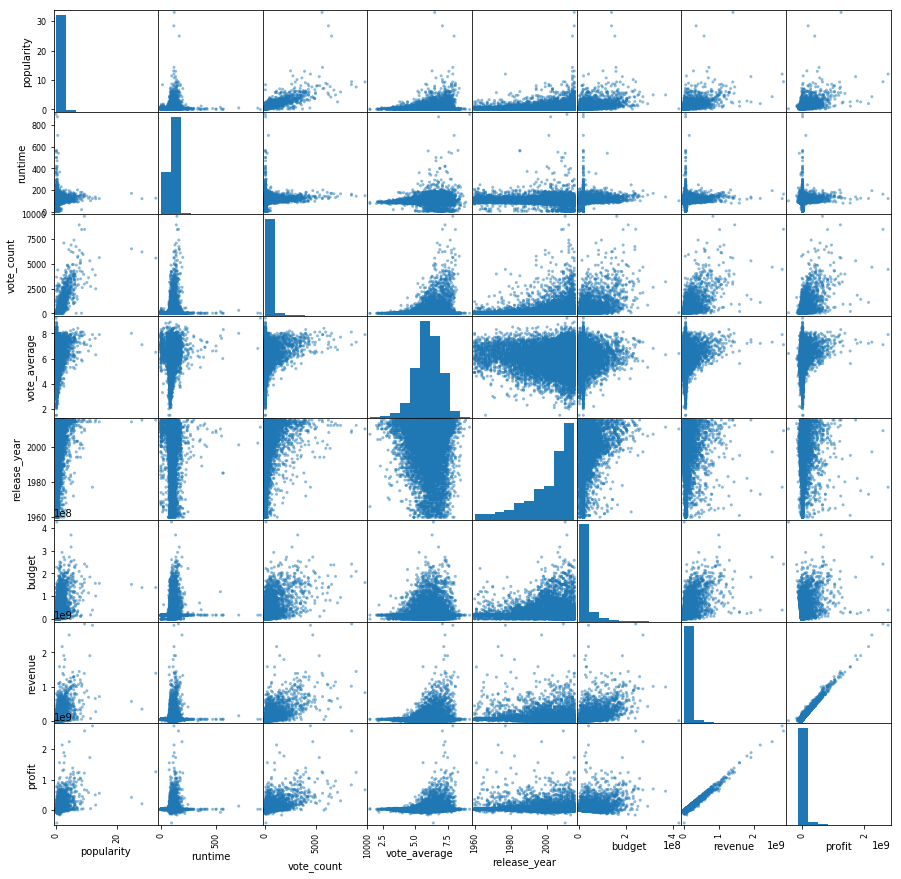

In [27]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
pd.plotting.scatter_matrix(df,figsize=(15,15));

In [28]:
df.corr()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit
popularity,1.000000,0.136851,0.800828,0.209517,0.089806,0.482815,0.578162,0.532210
runtime,0.136851,1.000000,0.162584,0.154552,-0.112168,0.204763,0.154940,0.123569
vote_count,0.800828,0.162584,1.000000,0.253818,0.107962,0.569203,0.685955,0.632353
vote_average,0.209517,0.154552,0.253818,1.000000,-0.117576,0.087895,0.173239,0.173824
release_year,0.089806,-0.112168,0.107962,-0.117576,1.000000,0.020369,-0.064884,-0.078576
budget,0.482815,0.204763,0.569203,0.087895,0.020369,1.000000,0.602133,0.428581
revenue,0.578162,0.154940,0.685955,0.173239,-0.064884,0.602133,1.000000,0.979416
profit,0.532210,0.123569,0.632353,0.173824,-0.078576,0.428581,0.979416,1.000000


From the above correlation matrix, we can conclude the following:
- There is high correlation between (profit & popularity), (profit & budget), (profit & vote count)
- There is high correlation between (popularity & budget), (popularity & revenue), (popularity & vote count)

## Let's explore distributions of different values

<function matplotlib.pyplot.show(*args, **kw)>

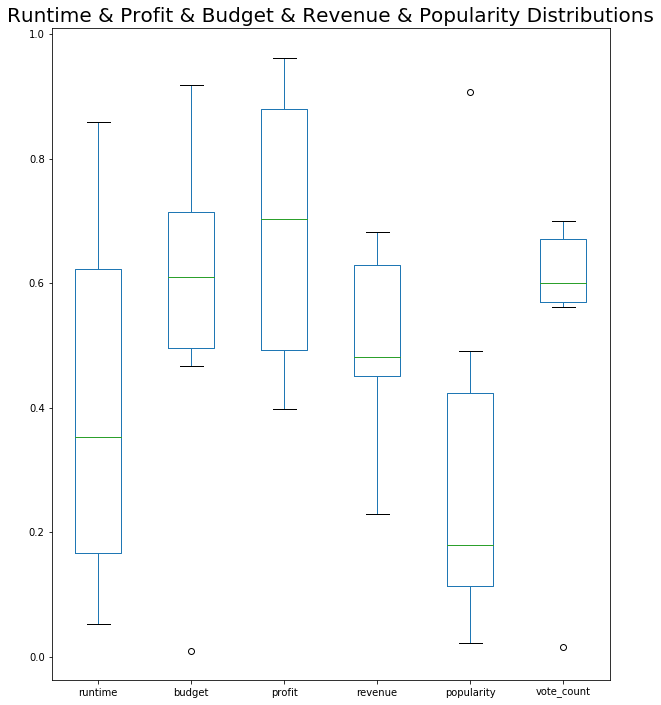

In [29]:
boxplot = pd.DataFrame(data = np.random.random(size=(6,6)), columns = ['runtime','budget','profit', 'revenue', 'popularity', 'vote_count'])
ax = boxplot.plot(kind='box')
fig = ax.get_figure()
fig.set_size_inches(10, 12)
ax.set_title('Runtime & Profit & Budget & Revenue & Popularity Distributions', fontsize=20)
plt.show

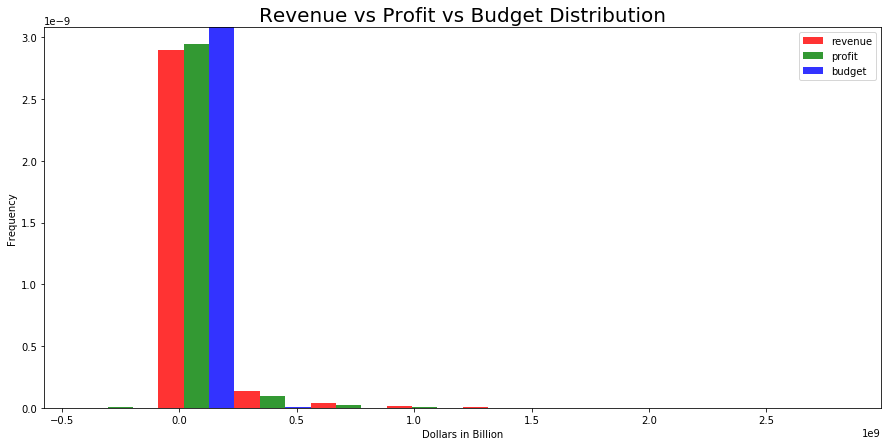

In [30]:
plt.subplots(figsize=(15, 7))
color= ['red', 'green', 'blue']
revenue=df['revenue']
profit=df['profit']
budget=df['budget']
names=['revenue', 'profit','budget']
plt.hist([revenue, profit, budget], alpha=0.8, color=color, label=names, rwidth=1, density=True)
plt.xlabel('Dollars in Billion')
plt.ylabel('Frequency')
plt.title('Revenue vs Profit vs Budget Distribution', fontsize=20)
plt.legend(loc= 'upper right')

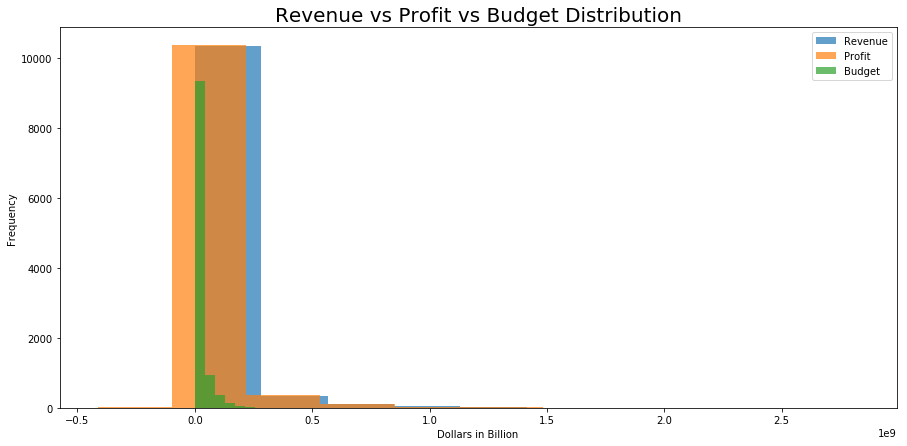

In [31]:
plt.subplots(figsize=(15, 7))
plt.hist(df['revenue'], alpha=0.7, label='Revenue')
plt.hist(df['profit'], alpha=0.7, label='Profit')
plt.hist(df['budget'], alpha=0.7, label='Budget')
plt.xlabel('Dollars in Billion')
plt.ylabel('Frequency')
plt.title('Revenue vs Profit vs Budget Distribution', fontsize=20)
plt.legend(loc= 'upper right')

In [32]:
# since there is a huge dispersion in vote_count and popularity we need to standardize their values
# in order to better compare between their respective distribution.

from sklearn import preprocessing
 
popularity=df['popularity']
vote_count=df['vote_count']
# standardization of dependent variables
standard_popular=preprocessing.scale(popularity)
vote_standard=preprocessing.scale(vote_count)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


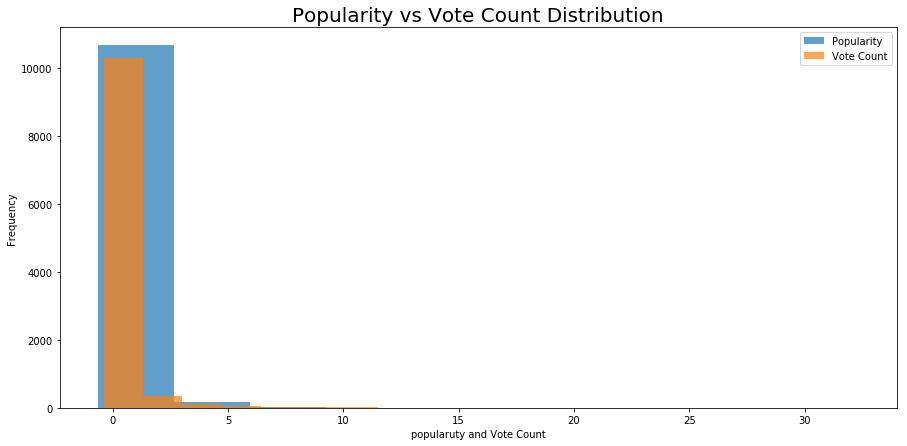

In [33]:
plt.subplots(figsize=(15, 7))
plt.hist(standard_popular, alpha=0.7, label= 'Popularity');
plt.hist(vote_standard,  alpha=0.7, label= 'Vote Count')
plt.xlabel('popularuty and Vote Count')
plt.ylabel('Frequency')
plt.title('Popularity vs Vote Count Distribution', fontsize=20)
plt.legend(loc='upper right')

In [34]:
# there are some outliers in runtime that we need to check
df.query('runtime > 600')

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,profit
id,,,,,,,,,,,,,,,
331214,0.537593,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,Phil Alden Robinson|Richard Loncraine|Mikael S...,world war ii|us army|war|paratroops|combat,705.0,Action|Drama|War,HBO,2001-09-09,313,8.0,2001,1.754989e+07,1.539360e+08,1.363861e+08
125336,0.006925,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,cinema|nouvelle vague|hindi cinema|cinema novo...,900.0,Documentary,NaN,2011-09-03,14,9.2,2011,1.754989e+07,5.136900e+07,3.381911e+07
150004,0.469332,Taken,Dakota Fanning|Matt Frewer|Eric Close|Emily Be...,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,NaN,877.0,Science Fiction,DreamWorks,2002-12-02,38,6.8,2002,1.754989e+07,5.136900e+07,3.381911e+07


These are mini series and not movies so they will be dropped

In [35]:
df.drop([331214,125336,150004], inplace=True)

## Let's explore some distributions per  movie

In [36]:
# Create a function for horiztontally bar ploting the largest 10 values 
def barplot (df, xlabel, ylabel, title):
    df=df.nlargest(10)
    ax=df.plot(kind='barh')
    fig = ax.get_figure()
    fig.set_size_inches(12,6)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=20)
    plt.show(ax)
    
# Create a functin for bar ploting
def bar (df, xlabel, ylabel, title):
    ax=df.plot(kind='bar')
    fig = ax.get_figure()
    fig.set_size_inches(12,6)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=20)
    plt.show(ax)   

#### How many movies have been produced per year?

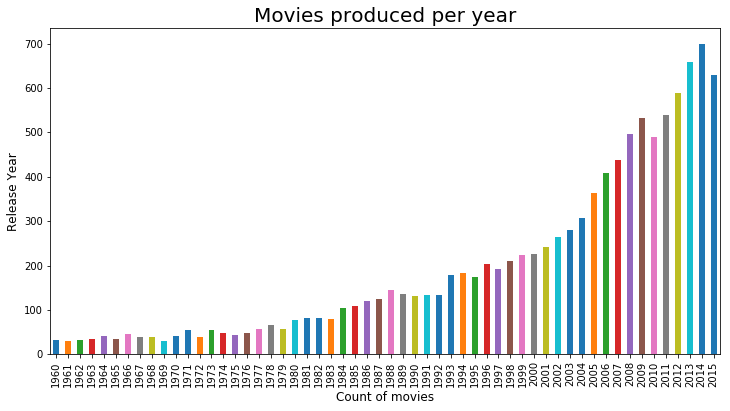

In [37]:
# How many movies has been produced per year
movie_per_year=df.groupby('release_year')['original_title'].count()
bar(movie_per_year,'Count of movies','Release Year','Movies produced per year' )

we can notice that as the years go on less movies are produced, but may be this dataset focus more on the old movies.

#### How the public rate movies?

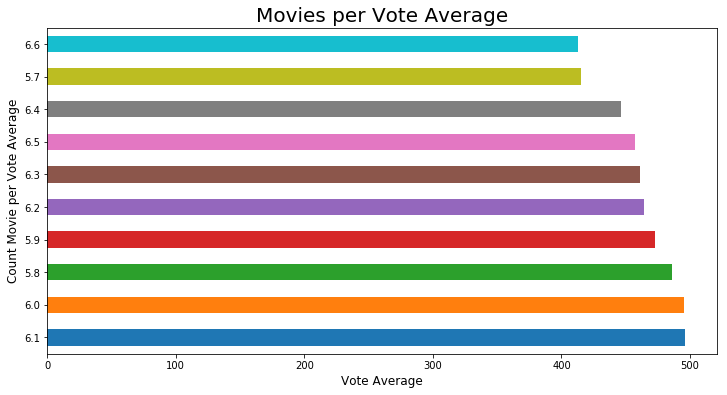

In [38]:
# distribution of movies per vote average
movie_per_vote_average=df.groupby('vote_average')['original_title'].count()
barplot(movie_per_vote_average, 'Vote Average','Count Movie per Vote Average', 'Movies per Vote Average')

We can notice that the public either like or dislike the movie, and rarely we find something in between.
When they like the movie, they tend to rate him 8 up to 10, if they dislike it they rate it below 6. Rarely they rate a movie by 7.

#### What are the most popular movies from 1960 to 2015?

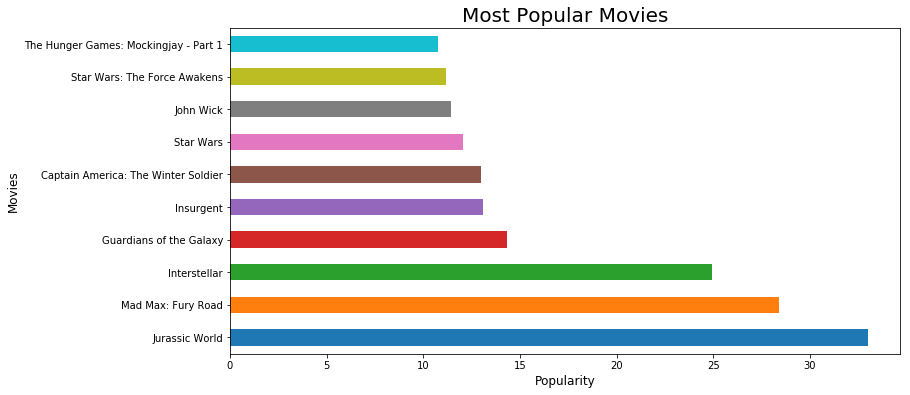

In [39]:
Most_popular_movies=df.groupby('original_title')['popularity'].sum()
barplot(Most_popular_movies,'Popularity','Movies', 'Most Popular Movies' )

#### What are the most profitable movies from 1960 to 2015?

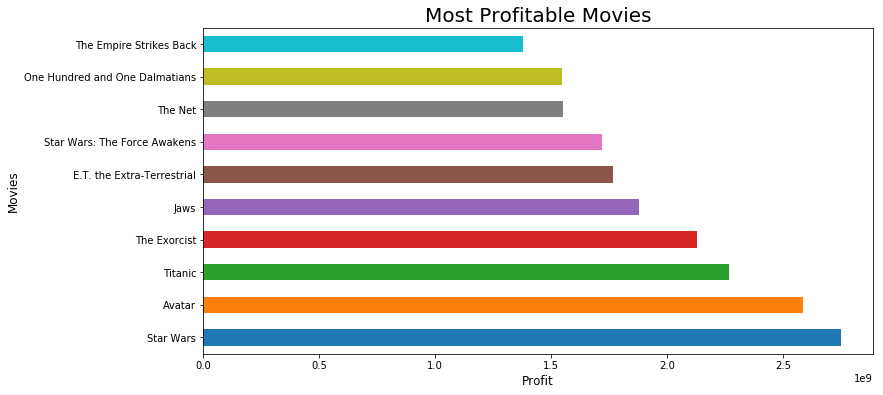

In [40]:
Most_popular_movies=df.groupby('original_title')['profit'].sum()
barplot(Most_popular_movies, 'Profit','Movies', 'Most Profitable Movies')

### What are the characteristics of high popular movies?

Let's divide the dataset by popularity levels.

Text(0.5,1,'Popularity Distribution')

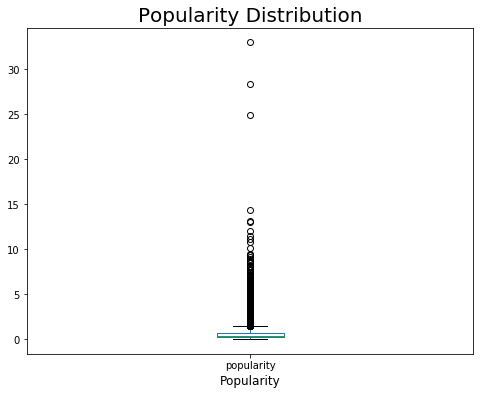

In [41]:
ax=df['popularity'].plot(kind='box')
fig = ax.get_figure()
fig.set_size_inches(8, 6)
ax.set_xlabel('Popularity', fontsize=12)
ax.set_title('Popularity Distribution', fontsize=20)

In [42]:
df.describe().popularity

count    10862.000000
mean         0.646531
std          1.000348
min          0.000065
25%          0.207583
50%          0.383829
75%          0.714063
max         32.985763
Name: popularity, dtype: float64

In [43]:
bin_edges = [0.000065, 0.207583,0.646531,15,32.985763]

In [44]:
bin_names = ['low_popularity', 'medium_popularity', 'high_popularity', 'extreme_popularity'] 

In [45]:


df['popularity_levels'] = pd.cut(df['popularity'], bin_edges, labels=bin_names)

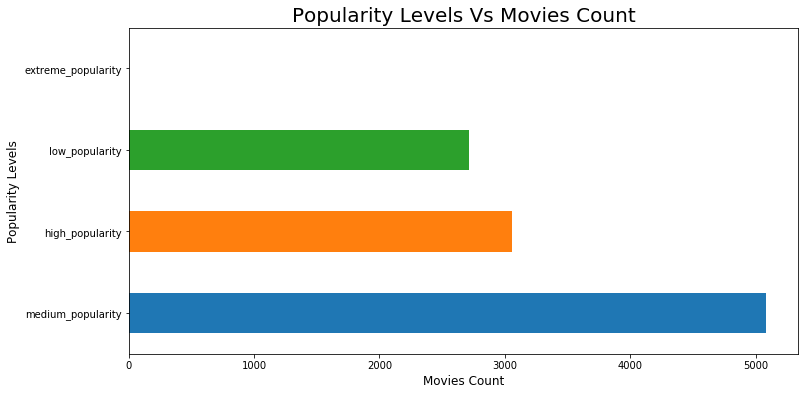

In [46]:
popular_title= df.groupby('popularity_levels')['original_title'].count()
barplot(popular_title,"Movies Count","Popularity Levels",'Popularity Levels Vs Movies Count')

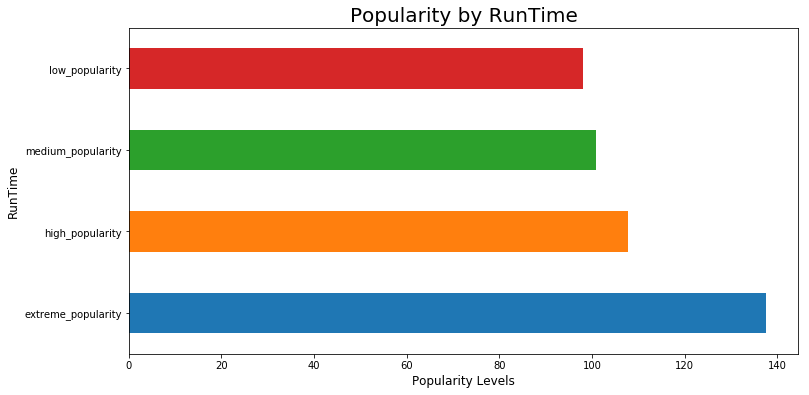

In [47]:
# Popularity based on runtime
runtime_per_popularity= df.groupby('popularity_levels')['runtime'].mean()
barplot(runtime_per_popularity,"Popularity Levels","RunTime",'Popularity by RunTime')

Long movies tend to be less popular.

In [48]:
pop_table = pd.pivot_table(df, values=['revenue', 'budget'],index=['popularity_levels'],
                    aggfunc={'revenue': np.mean,
                             'budget': np.mean})                 
pop_table

,budget,revenue
popularity_levels,,
low_popularity,1.678788e+07,4.771748e+07
medium_popularity,1.998988e+07,4.848875e+07
high_popularity,4.674477e+07,1.597565e+08
extreme_popularity,1.426600e+08,7.710993e+08


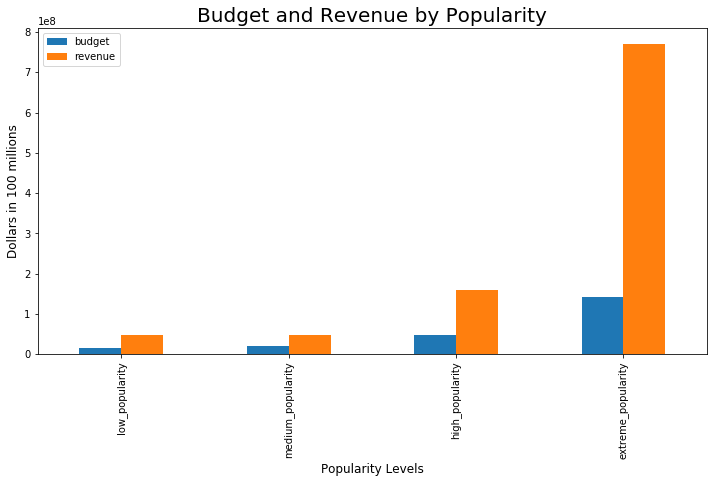

In [49]:
 bar(pop_table, "Popularity Levels", 'Dollars in 100 millions', "Budget and Revenue by Popularity")

In [50]:
pop2_table = pd.pivot_table(df, values=['vote_average'], index=['popularity_levels'],
                    aggfunc={
                             'vote_average': np.mean})  
                                       
pop2_table

,vote_average
popularity_levels,
low_popularity,5.899632
medium_popularity,5.847641
high_popularity,6.250703
extreme_popularity,7.200000


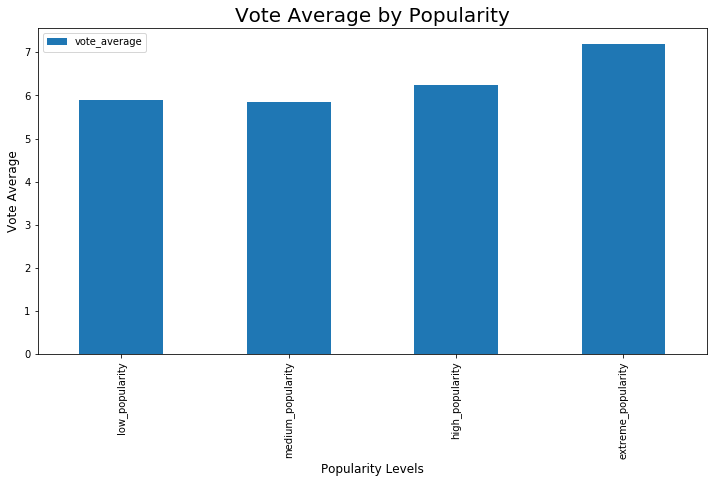

In [51]:
bar(pop2_table,"Popularity Levels", "Vote Average", "Vote Average by Popularity" )

### Do popular movies are profitble?

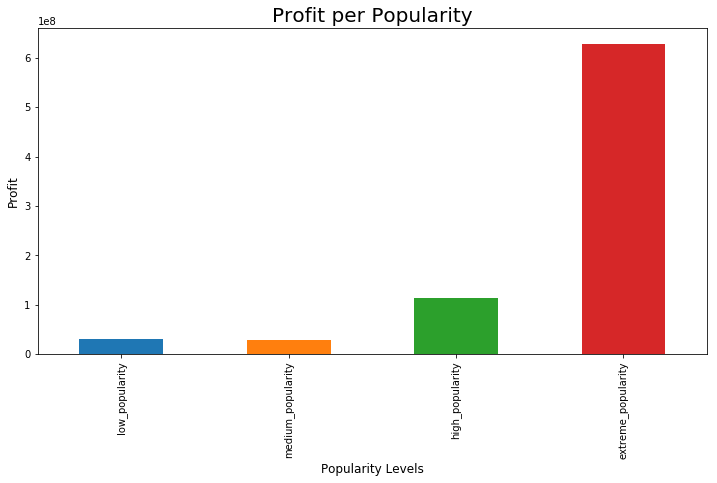

In [52]:
profit_per_popularity= df.groupby('popularity_levels')['profit'].mean()
bar(profit_per_popularity, 'Popularity Levels', 'Profit', 'Profit per Popularity'  )

### Does a big budget make a popular movie?

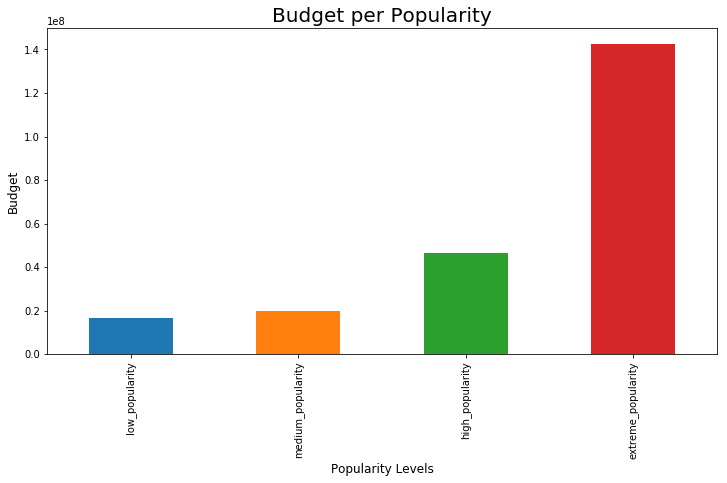

In [53]:
profit_per_popularity= df.groupby('popularity_levels')['budget'].mean()
bar(profit_per_popularity,'Popularity Levels','Budget', 'Budget per Popularity')

## Let's explore distributions per profit

Text(0.5,1,'Revenue Vs Budget vs Profit over the years')

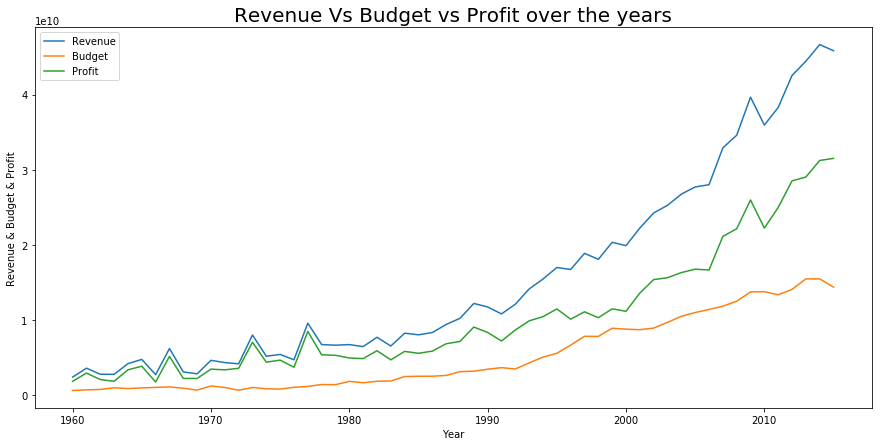

In [54]:
# plotting for budget and revenue by year
plt.subplots(figsize=(15, 7))
budget_per_year= df.groupby('release_year')['budget'].sum()
revenue_per_year= df.groupby('release_year')['revenue'].sum()
profit_per_year= df.groupby('release_year')['profit'].sum()
plt.plot(revenue_per_year, label= 'Revenue')
plt.plot(budget_per_year, label= 'Budget' )
plt.plot(profit_per_year, label= 'Profit' )
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Revenue & Budget & Profit')
plt.title('Revenue Vs Budget vs Profit over the years', fontsize=20)



we can notice that the gap between profit and budget is getting wider over the years.

In [55]:
profit_per_vote_average= df.groupby('vote_average')['profit'].sum()

Text(0.5,1,'Profit per Vote Average')

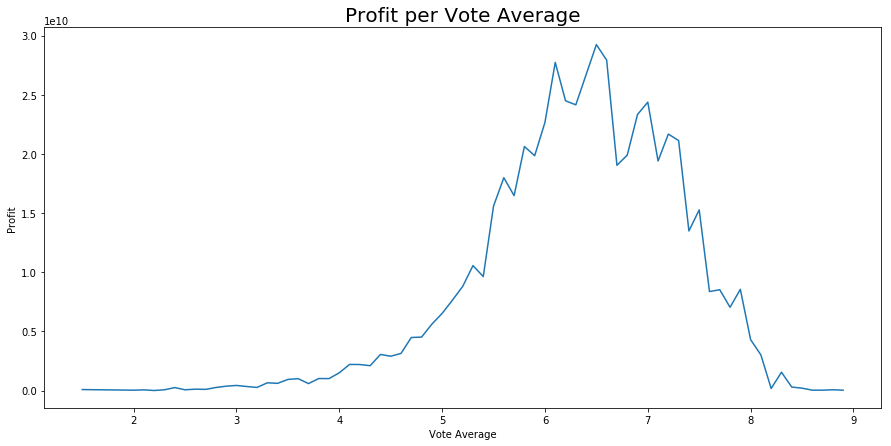

In [56]:
plt.subplots(figsize=(15, 7))
plt.plot(profit_per_vote_average)
plt.xlabel('Vote Average')
plt.ylabel('Profit')
plt.title('Profit per Vote Average', fontsize=20)

Text(0.5,1,'Runtime vs Profit')

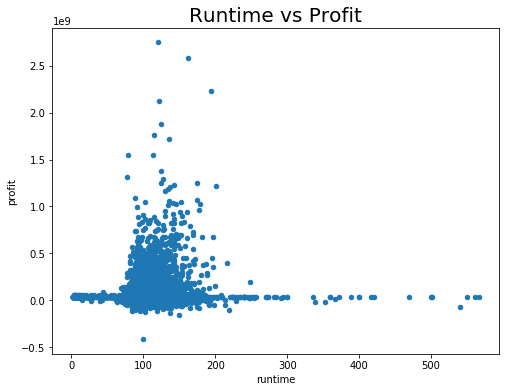

In [57]:
ax= df.plot(x= 'runtime', y='profit', kind='scatter')
fig = ax.get_figure()
fig.set_size_inches(8, 6)
ax.set_title('Runtime vs Profit', fontsize=20)

Most profits are for moderate long movies between roughly 90 and 160 minutes.

### What are the most profitable months in the year?

In [58]:
df['month']= df['release_date'].dt.month

In [59]:
df.head()

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,profit,popularity_levels,month
id,,,,,,,,,,,,,,,,,
135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,extreme_popularity,6
76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,extreme_popularity,5
262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,high_popularity,3
140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,high_popularity,12
168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,high_popularity,4


Text(0.5,1,'Profit per Month')

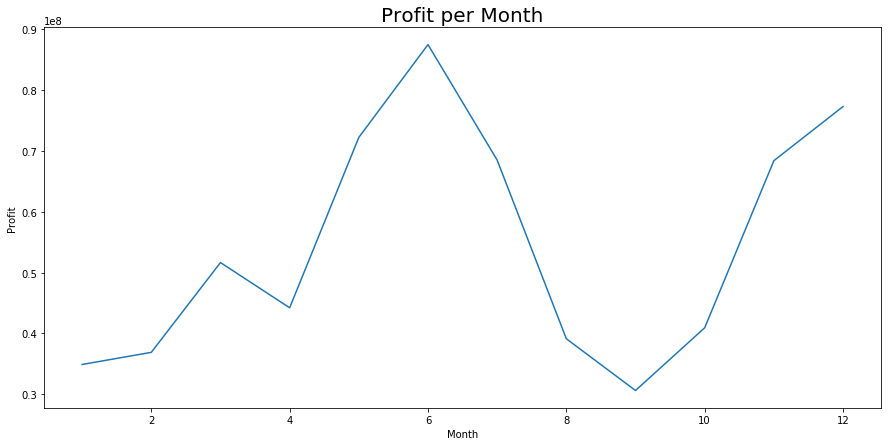

In [60]:
plt.subplots(figsize=(15, 7))
profit_per_year= df.groupby('month')['profit'].mean()
plt.plot(profit_per_year)
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Profit per Month', fontsize=20)

<function matplotlib.pyplot.show(*args, **kw)>

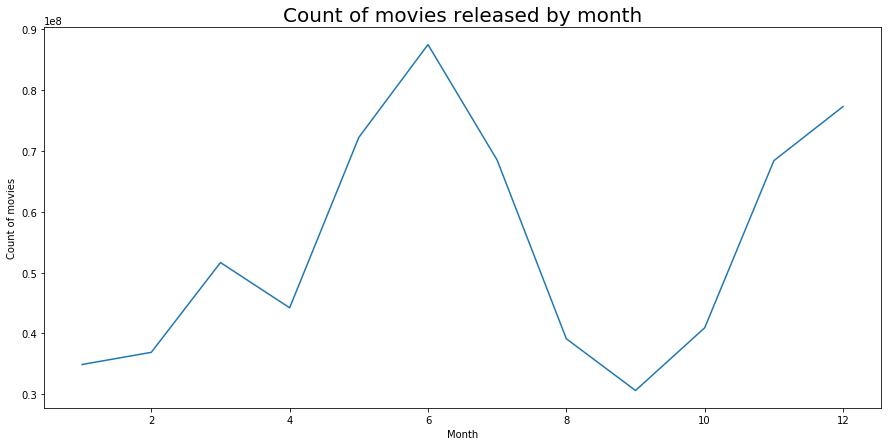

In [61]:
#release month
plt.subplots(figsize=(15, 7))
release_month= df.groupby('month')['original_title'].count()
plt.plot(profit_per_year)
plt.xlabel('Month')
plt.ylabel('Count of movies')
plt.title('Count of movies released by month', fontsize=20)
plt.show

Most profits are gained between April and August, then between October and December. While the majority of movies are released between August and November.

## Characteristics of high profit movies

In [62]:
df['profit'].mean()

53057659.657794476

In [63]:
high_profit_movies=df.query('profit > 53057659.65')

In [64]:
high_profit_movies.shape

(1624, 17)

In [65]:
high_profit_movies.corr()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit,month
popularity,1.000000,0.202589,0.741305,0.321654,0.291787,0.370234,0.466112,0.432435,-0.005070
runtime,0.202589,1.000000,0.288953,0.406502,-0.107265,0.324593,0.287377,0.246042,0.190630
vote_count,0.741305,0.288953,1.000000,0.419224,0.370228,0.505241,0.584418,0.533430,-0.031858
vote_average,0.321654,0.406502,0.419224,1.000000,-0.151325,0.008972,0.256382,0.279434,0.165314
release_year,0.291787,-0.107265,0.370228,-0.151325,1.000000,0.303444,-0.017468,-0.083974,-0.111943
budget,0.370234,0.324593,0.505241,0.008972,0.303444,1.000000,0.533076,0.371424,0.015213
revenue,0.466112,0.287377,0.584418,0.256382,-0.017468,0.533076,1.000000,0.983540,0.030220
profit,0.432435,0.246042,0.533430,0.279434,-0.083974,0.371424,0.983540,1.000000,0.029914
month,-0.005070,0.190630,-0.031858,0.165314,-0.111943,0.015213,0.030220,0.029914,1.000000


In [66]:
high_profit_movies.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit,month
count,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1.624000e+03,1.624000e+03,1.624000e+03,1624.000000
mean,1.785815,113.349138,935.379926,6.398030,1998.831281,6.140970e+07,2.861488e+08,2.247391e+08,7.306650
std,1.985566,21.189446,1166.126566,0.722601,12.851341,5.224425e+07,2.684520e+08,2.446284e+08,3.353049
min,0.044675,44.000000,10.000000,3.400000,1960.000000,2.248029e+02,5.629462e+07,5.311423e+07,1.000000
25%,0.768202,98.000000,204.000000,5.900000,1991.000000,2.032801e+07,1.235159e+08,8.351482e+07,5.000000
50%,1.262135,110.000000,514.000000,6.400000,2002.000000,4.415197e+07,1.961389e+08,1.365744e+08,7.000000
75%,2.120932,125.000000,1159.000000,6.900000,2009.000000,8.639404e+07,3.434388e+08,2.648276e+08,11.000000
max,32.985763,248.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09,12.000000


In [67]:
# detailes of highest profit movie
highest = high_profit_movies['profit'].idxmax()
highest_details = pd.DataFrame(high_profit_movies.loc[highest])
highest_details

,11
popularity,12.0379
original_title,Star Wars
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director,George Lucas
keywords,android|galaxy|hermit|death star|lightsaber
runtime,121
genres,Adventure|Action|Science Fiction
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation
release_date,1977-03-20 00:00:00
vote_count,4428


In [68]:
# detailes of highest revenue movie
highest = high_profit_movies['revenue'].idxmax()
highest_details = pd.DataFrame(high_profit_movies.loc[highest])
highest_details

,19995
popularity,9.43277
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
keywords,culture clash|future|space war|space colony|so...
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction
production_companies,Ingenious Film Partners|Twentieth Century Fox ...
release_date,2009-12-10 00:00:00
vote_count,8458


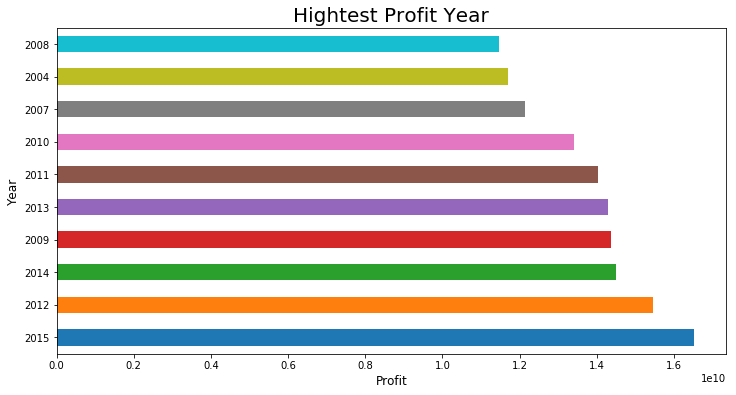

In [69]:
highest_profit_year = high_profit_movies.groupby('release_year')['profit'].sum()
barplot(highest_profit_year, "Profit", "Year", 'Hightest Profit Year')

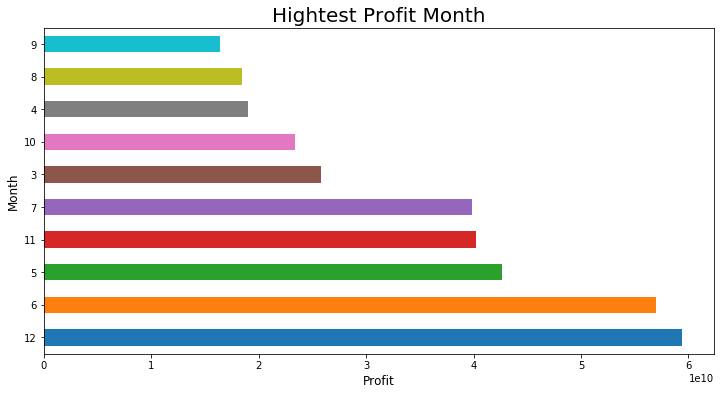

In [70]:
highest_profit_month = high_profit_movies.groupby('month')['profit'].sum()
barplot(highest_profit_month,"Profit", "Month", 'Hightest Profit Month' )

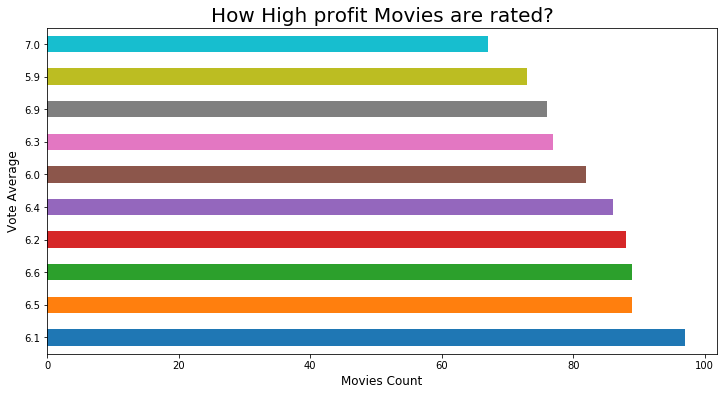

In [71]:
vote_title=high_profit_movies.groupby('vote_average')['original_title'].count()
barplot(vote_title,"Movies Count","Vote Average",'How High profit Movies are rated?')

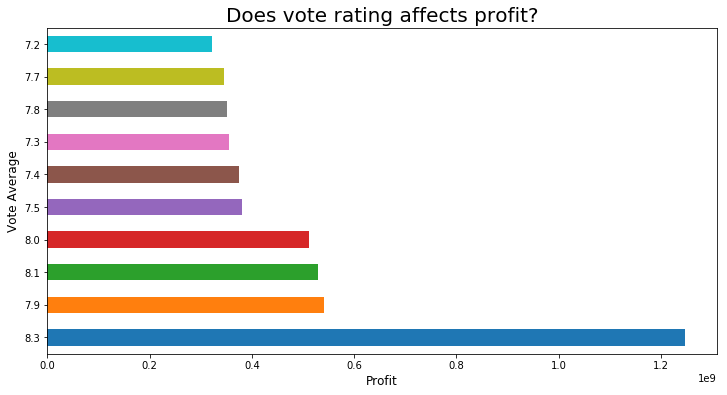

In [72]:
vote_profit=high_profit_movies.groupby('vote_average')['profit'].mean()
barplot(vote_profit,"Profit", "Vote Average", 'Does vote rating affects profit?' )

Text(0.5,1,'Runtime Vs Profit')

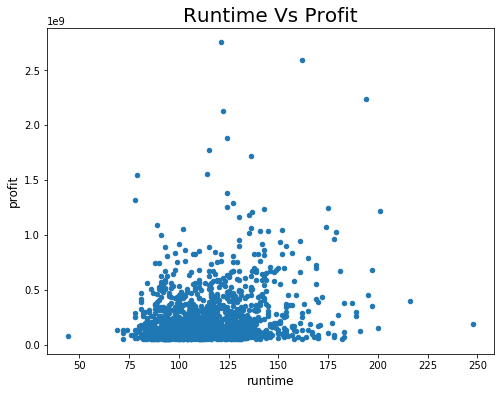

In [73]:
ax=high_profit_movies.plot(x= 'runtime', y='profit', kind='scatter')
fig = ax.get_figure()
fig.set_size_inches(8, 6)
ax.set_xlabel("runtime", fontsize=12)
ax.set_ylabel("profit", fontsize=12)
ax.set_title('Runtime Vs Profit', fontsize=20)

High profit Movies are between 75 and 200 minute.

Text(0.5,1,'Vote Count Vs Profit')

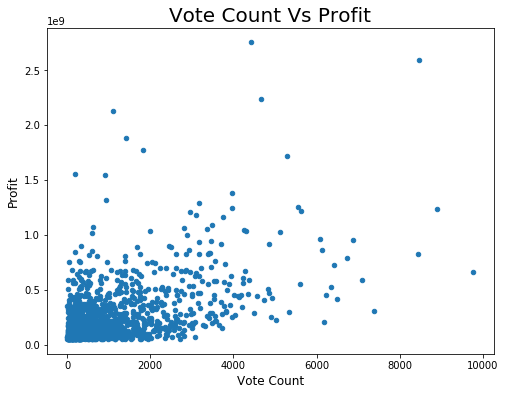

In [74]:
ax= high_profit_movies.plot(x= 'vote_count', y='profit', kind='scatter')
fig = ax.get_figure()
fig.set_size_inches(8, 6)
ax.set_xlabel("Vote Count", fontsize=12)
ax.set_ylabel("Profit", fontsize=12)
ax.set_title('Vote Count Vs Profit', fontsize=20)

High profit movies get more vote count

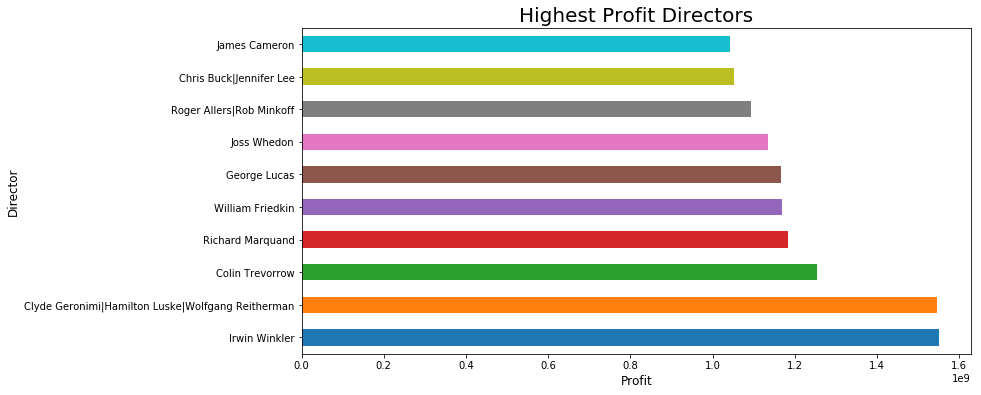

In [75]:
director_profit=high_profit_movies.groupby('director')['profit'].mean()
barplot(director_profit, "Profit", "Director", 'Highest Profit Directors' )

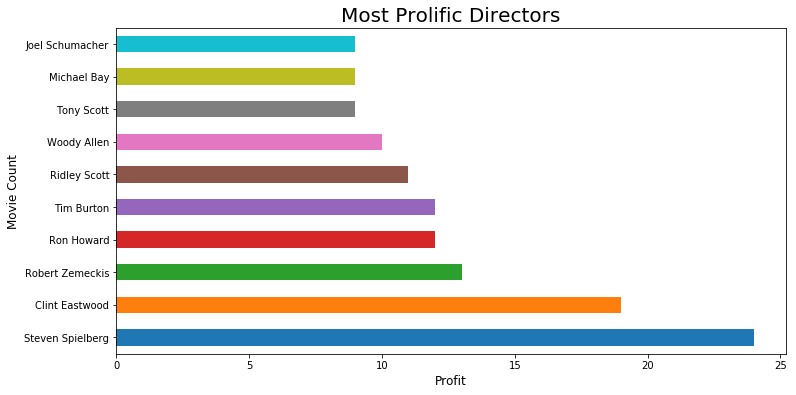

In [76]:
director_profit=high_profit_movies.groupby('director')['original_title'].count().sort_values(ascending=False)
barplot(director_profit, "Profit", "Movie Count", 'Most Prolific Directors' )

###  What are the genres of high profit movies?

In [77]:
genres_df=high_profit_movies['genres'].str.split("|", expand=True)
genres_df.head(2)

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None


In [78]:
genres_df = genres_df.stack()
genres_df = pd.DataFrame(genres_df)
genres_df.rename(columns={0:'genres_adj'}, inplace = True)
genres_df.head()

genres_adj
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [79]:
high_profit_movies_genres=high_profit_movies.merge(genres_df, right_on= 'id', left_on='id')

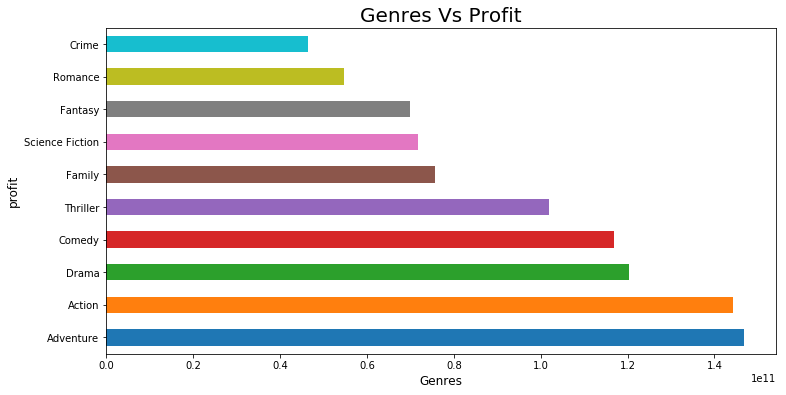

In [80]:
genres_profit= high_profit_movies_genres.groupby('genres_adj')['profit'].sum().sort_values(ascending=False)
barplot(genres_profit, "Genres", "profit",  'Genres Vs Profit')

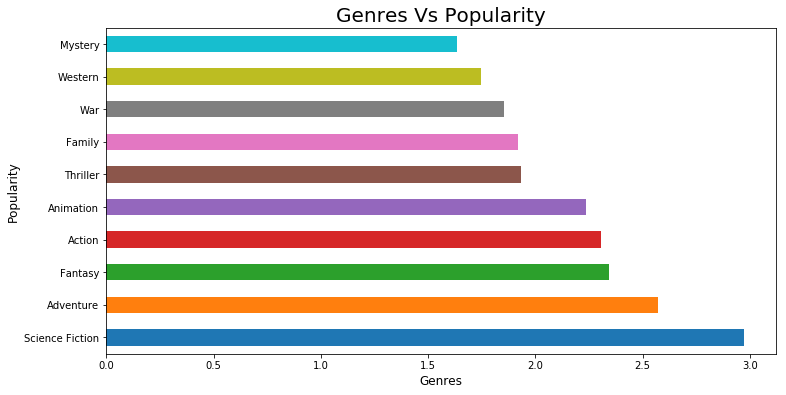

In [81]:
genres_popular=high_profit_movies_genres.groupby('genres_adj')['popularity'].mean().sort_values(ascending=False)
barplot(genres_popular,"Genres","Popularity",'Genres Vs Popularity' )

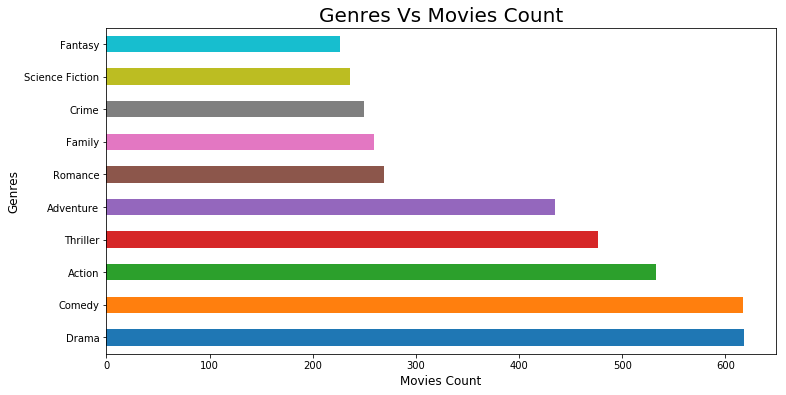

In [82]:
genres_count=high_profit_movies_genres.groupby('genres_adj')['original_title'].count().sort_values(ascending=False)
barplot(genres_count,"Movies Count","Genres",'Genres Vs Movies Count')

### Who are the most profitable actors?

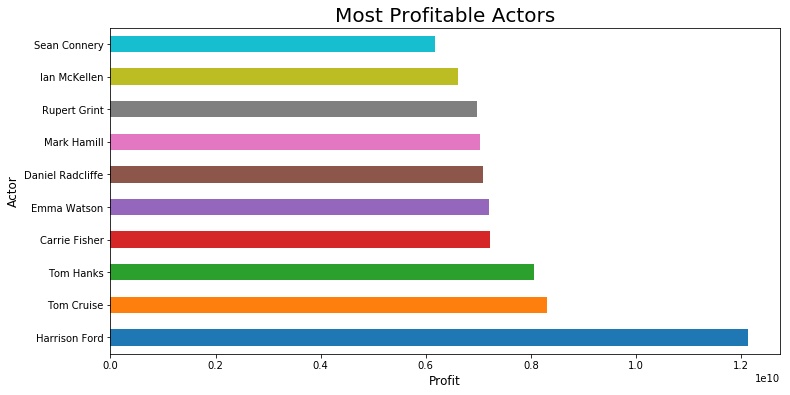

In [83]:
cast_df=high_profit_movies['cast'].str.split("|", expand=True)
cast_df.head(2)
cast_df = cast_df.stack()
cast_df = pd.DataFrame(cast_df)
cast_df.head()
cast_df.rename(columns={0:'cast_adj'}, inplace=True)
cast_df.cast_adj.value_counts()
high_profit_movies_cast=high_profit_movies.merge(cast_df, right_on= 'id', left_on='id')
cast_profit=high_profit_movies_cast.groupby('cast_adj')['profit'].sum().sort_values(ascending=False)
barplot(cast_profit,"Profit","Actor",'Most Profitable Actors')

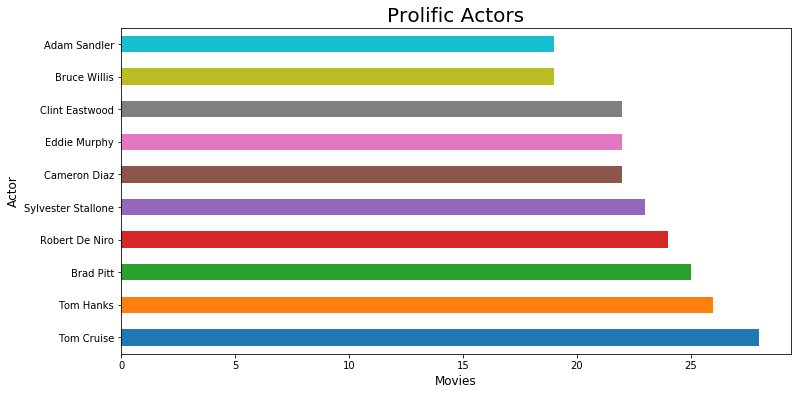

In [84]:
prolific_actor=high_profit_movies_cast.groupby('cast_adj')['original_title'].count().sort_values(ascending=False)
barplot(prolific_actor,"Movies","Actor",'Prolific Actors')

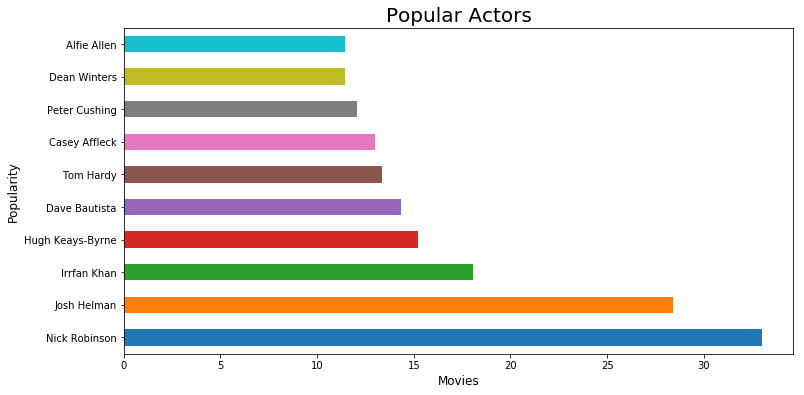

In [85]:
popular_cast=high_profit_movies_cast.groupby('cast_adj')['popularity'].mean().sort_values(ascending=False)
barplot(popular_cast,"Movies","Popularity",'Popular Actors')

### Who produced the high profit movies?

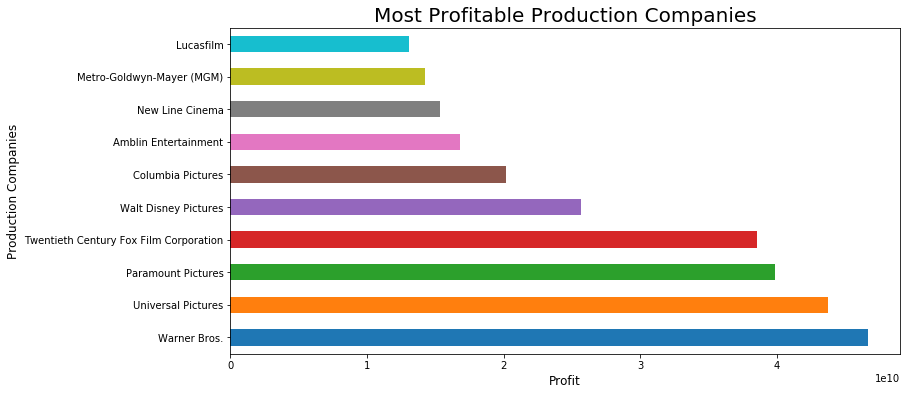

In [86]:
production_df=high_profit_movies['production_companies'].str.split("|", expand=True)
production_df = production_df.stack()
production_df = pd.DataFrame(production_df)
production_df.rename(columns={0:'production_adj'}, inplace=True)
production_df.production_adj.value_counts()
high_profit_movies_production=high_profit_movies.merge(production_df, right_on= 'id', left_on='id')
production_profit=high_profit_movies_production.groupby('production_adj')['profit'].sum().sort_values(ascending=False)
barplot(production_profit,"Profit","Production Companies",'Most Profitable Production Companies' )

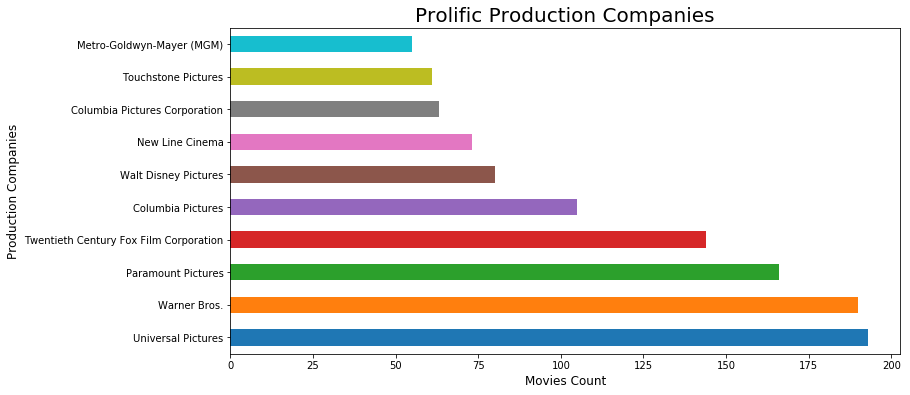

In [87]:
prolific_production=high_profit_movies_production.groupby('production_adj')['original_title'].count().sort_values(ascending=False)
barplot(prolific_production,"Movies Count","Production Companies",'Prolific Production Companies')

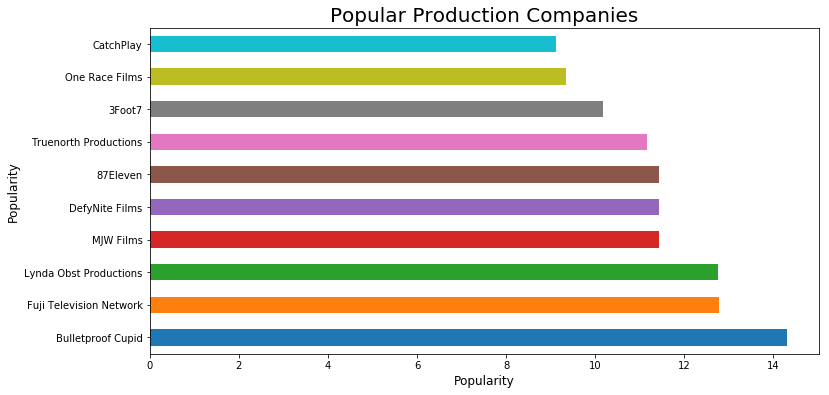

In [88]:
popular_production=high_profit_movies_production.groupby('production_adj')['popularity'].mean().sort_values(ascending=False)
barplot(popular_production,"Popularity","Popularity",'Popular Production Companies')

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

>> From the above analysis we can conclude the following:

>**Limitations**: 
- This Dataset covers only the period between 1960 and 2015.
- As the dataset covers only movies produced between 1960 and 2015, and the platforms boom has raised after that, it doesn't account for the effect of these platforms on the movie industry.
- This Dataset isn't a comprhensive list for all the movies produced during this period, so the inferences of this analysis is based only on the movies in this dataset.
- The popularity and vote average are based only on the IMDB users.
- Some of the movies info specially the old ones aren't reliable because IMDB rely partially on it users to add some movies info.

> General Conclusions

- There is a high correlation between (profit & popularity), (profit & budget), (profit & vote count)
- There is a high correlation between (popularity & budget), (popularity & revenue), (popularity & vote count)
- Graphs shows that profit, popularity and distributions go along.
- Popularity and vote count distributions are similar.
- The public either like or dislike the movie, and rarely we find something in between. When they like the movie, they tend to rate him 8 up to 10, if they dislike it they rate it below 6. Rarely they rate a movie by 7.
- The most year in which movies have been produced is 2013
- Most movies are rated between 6 and 5
- Most popular movies are Jurassic World, Mad Max: Fury Road and Interstellar
- Most profits are gained between April and August, then between October and December. While the majority of movies are released between August and November.
- the gap between profit and budget is getting wider over the years.

> What are the characteristics of high popular movies?
- Most movies are of medium popularity
- High popular movies are between 100 and 120 minute
- The highest the budget and revenue the more the movie is popular
- High popular movies rates are between 6 and 7
- A big budget can make a popular movie

> Characteristics of high profit movies
- The most profitable movie is Star Wars
- The highest revenue movie is Avatar
- Highest profit year is 2015
- Highest profit months are 12 and 6
- High profit movies are rated between 7 and 8
- High profit Movies are between 75 and 200 minute.
- High profit movies get more vote count
- High profit movies are directed by Irwin Winkler and Colin Tervorrow
- High profit movies geres are Adventure, Action and Drama
- Actors in high profit movies are Harrison Ford, Tom Cruise and Tom Hanks
- High profit movies are produced by Universal Pictures, Warner Bros, ans Paramount Pict

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [89]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0